<a href="https://colab.research.google.com/github/KhoirotunNisa25/Machine_Learning_2025/blob/main/JS04_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

## 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
# Seleksi Fitur
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


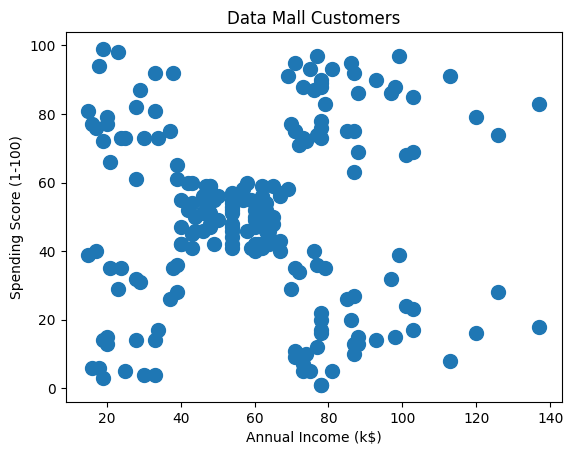

In [15]:
# Visualisasi awal
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Data Mall Customers")
plt.show()

In [16]:
# Buat Model KMeams

cl_kmeans = KMeans(n_clusters=2)
y_kmeans = cl_kmeans.fit_predict(X)

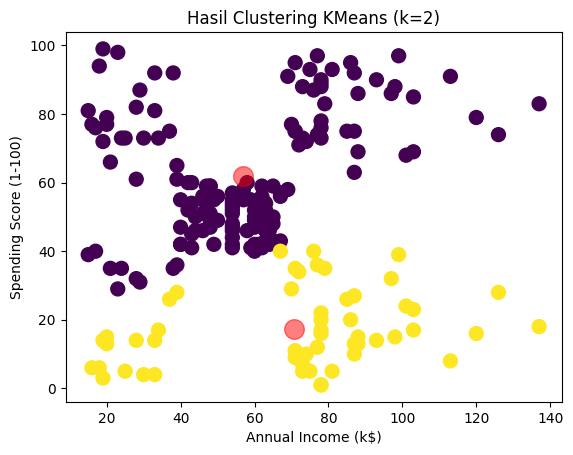

In [17]:
# Plot hasil cluster
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hasil Clustering KMeans (k=2)")
plt.show()

In [18]:
print(f'Nilai SSe: {cl_kmeans.inertia_}')

Nilai SSe: 184609.98434090626


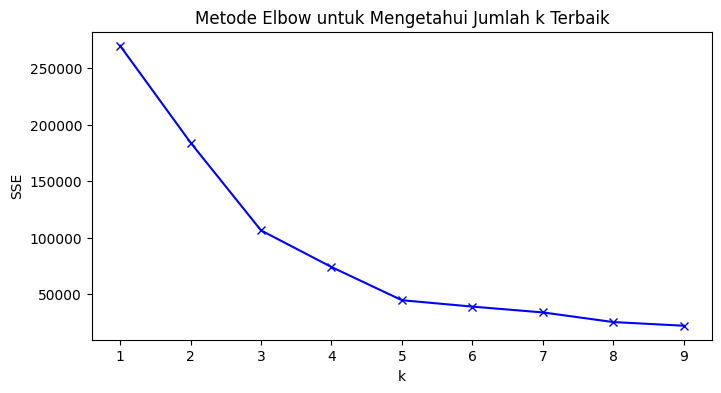

In [19]:
# Elbow Method untuk mencari jumlah k terbaik
sse = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [20]:
# Cetak nilai SSE
for idx, sse_val in enumerate(sse, start=1):
    print(f"k={idx}; SSE={sse_val}")

k=1; SSE=269981.28000000014
k=2; SSE=184131.8850278851
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44454.47647967972
k=6; SSE=38792.367293075135
k=7; SSE=33630.44120607162
k=8; SSE=25094.432930794686
k=9; SSE=21850.16528258562


## 2. Tugas DBSCAN

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
5. Lakukan eksperimen:
    - eps = 0.05, 0.1, 0.3, 0.5
    - min_samples = 3, 10, 20
    - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [28]:
import seaborn as sns; sns.set()
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [54]:
# 1. Buat dataset make_moons
x, y = make_moons(1000, noise=0.05, random_state=0)


Text(0.5, 1.0, 'Data Sebelum Normalisasi')

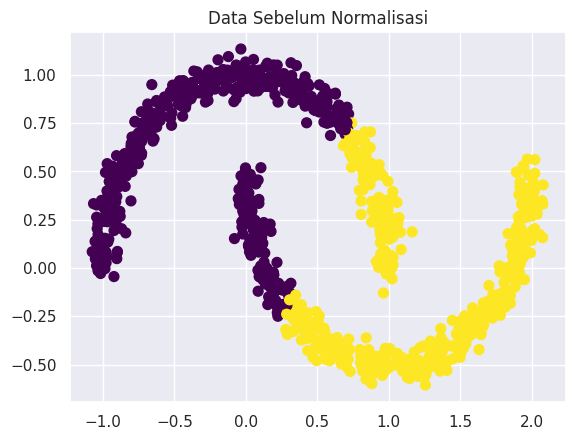

In [55]:
labels = KMeans(2, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels,s=50, cmap='viridis');
plt.title("Data Sebelum Normalisasi")

Text(0.5, 1.0, 'Data Setelah Normalisasi')

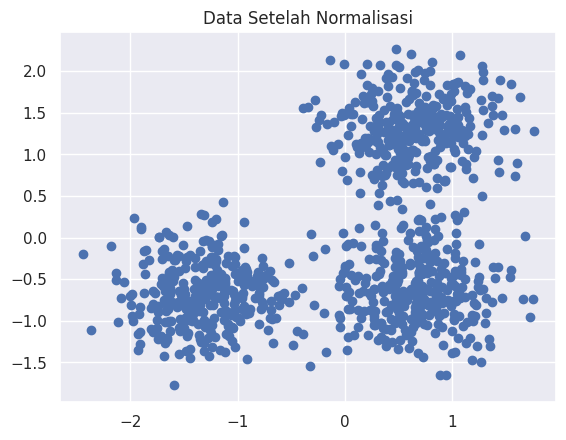

In [56]:
centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.4, random_state=0,
)

x = StandardScaler().fit_transform(x)
plt.scatter(x[:, 0], x[:, 1])
plt.title("Data Setelah Normalisasi")

In [57]:
# 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
db = DBSCAN(eps=0.2, min_samples=5).fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 34


In [58]:
# 3. Evaluasi Kualitas Klasterisasi
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.547
Completeness: 0.788
V-measure: 0.646
Adjusted Rand Index: 0.540
Adjusted Mutual Information: 0.645
Silhouette Coefficient: -0.042


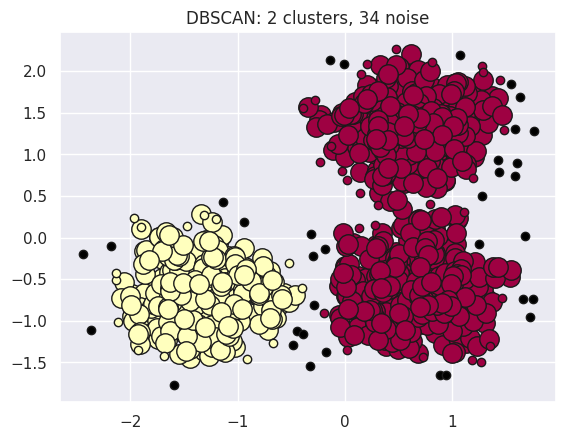

In [59]:
# 4. Visualisasi Hasil Klasterisasi
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=6
    )

plt.title(f"DBSCAN: {n_clusters_} clusters, {n_noise_} noise")
plt.show()

In [65]:
# Lakukan eksperimen:, eps = 0.05, 0.1, 0.3, 0.5, min_samples = 3, 10, 20

eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 10, 20]

print("\nEksperimen DBSCAN (eps, min_samples):")
print("eps\tmin_samples\tclusters\tnoise\tH\tC\tV\tARI\tAMI\tSilhouette")
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(x)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        # Untuk evaluasi, jika semua noise, skip
        if n_clusters_ == 0:
            H = C = V = ARI = AMI = Silhouette = 0
        else:
            H = metrics.homogeneity_score(labels_true, labels)
            C = metrics.completeness_score(labels_true, labels)
            V = metrics.v_measure_score(labels_true, labels)
            ARI = metrics.adjusted_rand_score(labels_true, labels)
            AMI = metrics.adjusted_mutual_info_score(labels_true, labels)
            try:
                Silhouette = metrics.silhouette_score(x, labels)
            except:
                Silhouette = 0
        print(f"{eps:.2f}\t{min_samples}\t\t{n_clusters_}\t\t{n_noise_}\t{H:.2f}\t{C:.2f}\t{V:.2f}\t{ARI:.2f}\t{AMI:.2f}\t{Silhouette:.2f}")


Eksperimen DBSCAN (eps, min_samples):
eps	min_samples	clusters	noise	H	C	V	ARI	AMI	Silhouette
0.05	3		99		482	0.52	0.19	0.28	0.01	0.23	-0.16
0.05	10		0		1000	0.00	0.00	0.00	0.00	0.00	0.00
0.05	20		0		1000	0.00	0.00	0.00	0.00	0.00	0.00
0.10	3		24		149	0.84	0.48	0.61	0.59	0.61	-0.14
0.10	10		15		567	0.43	0.29	0.35	0.08	0.34	-0.32
0.10	20		0		1000	0.00	0.00	0.00	0.00	0.00	0.00
0.20	3		3		17	0.55	0.82	0.66	0.54	0.66	0.19
0.20	10		3		86	0.88	0.75	0.81	0.85	0.81	0.56
0.20	20		3		232	0.77	0.61	0.69	0.64	0.68	0.41
0.30	3		1		4	0.00	0.08	0.00	0.00	0.00	0.23
0.30	10		2		12	0.54	0.87	0.67	0.55	0.67	0.46
0.30	20		3		39	0.91	0.82	0.87	0.91	0.87	0.60
0.50	3		1		0	0.00	1.00	0.00	0.00	0.00	0.00
0.50	10		1		0	0.00	1.00	0.00	0.00	0.00	0.00
0.50	20		1		0	0.00	1.00	0.00	0.00	0.00	0.00
